## In the jungle, the mighty jungle

In [260]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import re

In [261]:
jungle = Path('map.txt').read_text().split('\n')

jungle_map = jungle[0:-2]
instructions = jungle[-1]

steps = [int(num) for num in re.split('[RL]', instructions)]
turns = re.split('\d+', instructions)[1:]

instructions = [(step, turn) for step, turn in zip(steps, turns)]


width = max([len(line) for line in jungle_map])
height = len(jungle_map)

jungle_arr = np.zeros((height, width), dtype = 'u1')

for i in range(height):
    line = jungle_map[i]
    line_length = len(line)
    
    jungle_arr[i, 0:line_length] = [0 if char == ' ' else 1 if char == '.' else 2 for char in line]

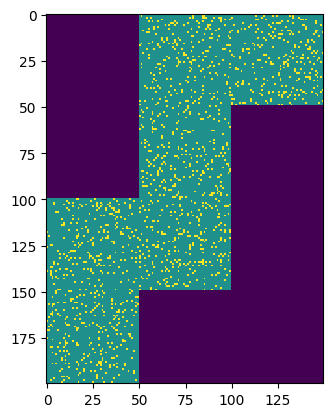

In [262]:
plt.imshow(jungle_arr, interpolation = 'none')

In [263]:
def travel(pos, heading, instruction, jungle = jungle_arr):
    height, width = jungle.shape
    steps, turn = instruction
    
    y,x = pos
    
    if heading == 0:
        dy, dx = [0, 1]
        if x + steps < width:
            ahead = jungle[y, x:x+steps+1]
        else:
            ahead = jungle[y, x:]
            
    elif heading == 2:
        dy, dx = [0, -1]
        if x - steps > 0:
            ahead = jungle[y, x:x-steps-1:-1]
        else:
            ahead = jungle[y, x::-1]
            
    elif heading == 1:
        dy, dx = [1, 0]
        if y + steps < height:
            ahead = jungle[y:y+steps+1, x]
        else:
            ahead = jungle[y:, x]
    
    elif heading == 3:
        dy, dx = [-1, 0]
        if y - steps > 0:
            ahead = jungle[y:y-steps-1:-1, x]
        else:
            ahead = jungle[y::-1, x]
    
    
    void = np.where(ahead == 0)[0]
    wall = np.where(ahead == 2)[0]
    
    
    
    if len(wall) > 0:
        wall = wall[0]
        steps_taken = wall-1
        
        if turn == 'R':
            heading = (heading + 1)%4
        
        elif turn == 'L':
            heading = (heading - 1)%4
        
        return (y + steps_taken*dy, x + steps_taken*dx), heading
    
    
    
    
    
    if len(void) > 0:
        
        void = void[0]
        steps_taken = void - 1
        
        remainder = steps - steps_taken
        
    else:
        
        steps_taken = len(ahead)-1
        remainder = steps - steps_taken
        
    y, x = [y + dy*steps_taken, x + dx*steps_taken]
    
    if remainder > 0: # We've hit a boundary
        
        if dy == 0:
            behind = jungle[y, x::-dx]
        else:
            behind = jungle[y::-dy, x]
            
        last_nonzero = np.where(behind > 0)[0][-1]
        
        if behind[last_nonzero] == 2:
            if turn == 'R':
                heading = (heading+1)%4
            elif turn == 'L':
                heading = (heading-1)%4
                
            return (y,x), heading
        
        elif behind[last_nonzero] == 1:
            if remainder == 1:
                if turn == 'R':
                    heading = (heading+1)%4
                elif turn == 'L':
                    heading = (heading-1)%4
                
                return (y - dy*last_nonzero, x - dx*last_nonzero), heading
            
            else:
                return travel((y - dy*last_nonzero, x - dx*last_nonzero), heading, (remainder-1, turn), jungle)
            
    else:
        if turn == 'R':
            heading = (heading+1)%4
        elif turn == 'L':
            heading = (heading-1)%4
            
        return (y,x), heading
        
        
        

In [264]:
start_position = np.where(jungle_arr[0] == 1)[0][0]
current_position = (0, start_position)
current_heading = 0

for i in range(len(instructions)):
    current_position, current_heading = travel(current_position, current_heading, instructions[i])
    

In [265]:
y,x = current_position
heading = current_heading

1000*(y+1) + 4*(x+1) + heading

55244

## Part 2: Near the village, the peaceful village

In [280]:
def cube_travel(pos, heading, instruction, jungle = jungle_arr):
    height, width = jungle.shape
    steps, turn = instruction
    
    y,x = pos
    
    if heading == 0:
        dy, dx = [0, 1]
        if x + steps < width:
            ahead = jungle[y, x:x+steps+1]
        else:
            ahead = jungle[y, x:]
            
    elif heading == 2:
        dy, dx = [0, -1]
        if x - steps > 0:
            ahead = jungle[y, x:x-steps-1:-1]
        else:
            ahead = jungle[y, x::-1]
            
    elif heading == 1:
        dy, dx = [1, 0]
        if y + steps < height:
            ahead = jungle[y:y+steps+1, x]
        else:
            ahead = jungle[y:, x]
    
    elif heading == 3:
        dy, dx = [-1, 0]
        if y - steps > 0:
            ahead = jungle[y:y-steps-1:-1, x]
        else:
            ahead = jungle[y::-1, x]
    
    
    void = np.where(ahead == 0)[0]
    wall = np.where(ahead == 2)[0]
    
    
    
    if len(wall) > 0:
        wall = wall[0]
        steps_taken = wall-1
        
        if turn == 'R':
            heading = (heading + 1)%4
        
        elif turn == 'L':
            heading = (heading - 1)%4
        
        return (y + steps_taken*dy, x + steps_taken*dx), heading
    
    
    
    
    
    if len(void) > 0:
        
        void = void[0]
        steps_taken = void - 1
        
        remainder = steps - steps_taken
        
    else:
        
        steps_taken = len(ahead)-1
        remainder = steps - steps_taken
        
    y, x = [y + dy*steps_taken, x + dx*steps_taken]
    
    if remainder > 0: # We've hit a boundary
        
        old_heading = heading
        # Face 5 to 1
        if y == 0 and x>=50 and x<100 and heading == 3:
            crossover = (150 + x - 50, 0)
            heading = 0
            
        elif x == 0 and y>=150 and y < height and heading == 2:
            crossover = (0, 50 + y - 150)
            heading = 1
        
        # Face 5 to 2
        elif x == 50 and y>=0 and y < 50 and heading == 2:
            crossover = (149-y, 0)
            heading = 0
            
        elif x == 0 and y >= 100 and y < 150 and heading == 2:
            crossover = (149-y, 50)
            heading = 0
            
        # Face 6 to 1
        elif y == 0 and x>=100 and x<width and heading == 3:
            crossover = (height-1, x - 100)
            heading = 3
        
        elif y == height-1 and x>=0 and x<50 and heading == 1:
            crossover = (0, 100 + x)
            heading = 1
            
        # Face 6 to 4
        elif y==49 and x>=100 and x<width and heading == 1:
            crossover = (50 + x - 100, 99)
            heading = 2
        
        elif x==99 and y>=50 and y<100 and heading == 0:
            crossover = (49, 100 + y-50)
            heading = 3
            
        # Face 6 to 3
        elif x == width-1 and y>=0 and y<50 and heading == 0:
            crossover = (149 - y, 99)
            heading = 2
        
        elif x == 99 and y>=100 and y<150 and heading == 0:
            crossover = (149 - y, 149)
            heading = 2
            
        # Face 4 to 2
        elif x == 50 and y>= 50 and y<100 and heading == 2:
            crossover = (100, y-50)
            heading = 1
        
        elif y == 100 and x >= 0 and x<50 and heading == 3:
            crossover = (50+x, 50)
            heading = 0
            
        # Face 3 to 1
        elif y==149 and x >= 50 and x< 100 and heading == 1:
            crossover = (100 + x, 49)
            heading = 2
        
        elif x == 49 and y>=150 and y<height and heading == 0:
            crossover = (149, y - 100)
            heading = 3
            
             
        
        if jungle[crossover] == 2:

            if turn == 'R':
                heading = (old_heading+1)%4
            elif turn == 'L':
                heading = (old_heading-1)%4  

            
            return (y,x), heading
        
        return cube_travel(crossover, heading, (remainder-1, turn), jungle)
    
    else:
        if turn == 'R':
            heading = (heading+1)%4
        elif turn == 'L':
            heading = (heading-1)%4
            
        return (y, x), heading 
        
        
        
        

In [281]:
start_position = np.where(jungle_arr[0] == 1)[0][0]
current_position = (0, start_position)
current_heading = 0

for i in range(len(instructions)):
    prev_heading = current_heading
    current_position, current_heading = cube_travel(current_position, current_heading, instructions[i])
    
    if current_position == (199, 9):
        print(current_position, prev_heading, current_heading, i, instructions[i+1])
    

In [282]:
y,x = current_position
heading = current_heading

1000*(y+1) + 4*(x+1) + heading

123149